#Mega Case Study - Making a hybrid Deep Learning Model

#Part 1 - SOM

##Install MiniSom Package

In [0]:
!pip install MiniSom

## Importing the libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

In [21]:
dataset

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


## Feature Scaling


In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##Training the SOM


In [4]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

##Visualizing the results


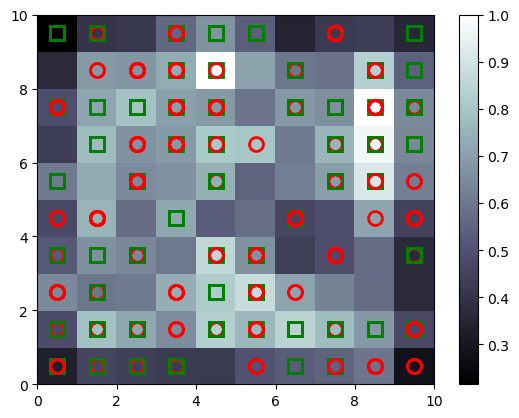

In [5]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [6]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(5,9)], mappings[(9,7)]), axis = 0)
frauds = sc.inverse_transform(frauds)

##Printing the Fraunch Clients

In [7]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15788776
15775235
15750921
15762716
15744423
15814116
15785705
15786237
15671014
15579583
15642336
15740487
15811742
15702571
15715907
15768342
15748532
15689692
15788634


#Part 2 - Going from Unsupervised to Supervised Deep Learning

##Create Matrix of Features

In [8]:
customers = dataset.iloc[:, 1:].values

## Create Dependent Variable

In [9]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

In [10]:
is_fraud

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

#Part 3 - ANN

### Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

## Building the ANN

##Import Tensorflow

In [12]:
import tensorflow as tf
tf.__version__

2023-07-26 14:24:23.732537: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


'2.12.0'

## Initializing the ANN

In [13]:
ann = tf.keras.models.Sequential()

##Adding the input layer and the first hidden layer

In [14]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

## Adding the output layer

In [15]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

## Compiling the ANN

In [16]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training the ANN on the Training set

In [17]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 [==============================] - 1s 892us/step - loss: 0.3494 - accuracy: 0.9725
Epoch 2/10
690/690 [==============================] - 1s 735us/step - loss: 0.2080 - accuracy: 0.9725
Epoch 3/10
690/690 [==============================] - 1s 737us/step - loss: 0.1544 - accuracy: 0.9725
Epoch 4/10
690/690 [==============================] - 1s 736us/step - loss: 0.1298 - accuracy: 0.9725
Epoch 5/10
690/690 [==============================] - 1s 790us/step - loss: 0.1157 - accuracy: 0.9725
Epoch 6/10
690/690 [==============================] - 1s 735us/step - loss: 0.1072 - accuracy: 0.9725
Epoch 7/10
690/690 [==============================] - 1s 725us/step - loss: 0.1003 - accuracy: 0.9725
Epoch 8/10
690/690 [==============================] - 1s 754us/step - loss: 0.0951 - accuracy: 0.9725
Epoch 9/10
690/690 [==============================] - 1s 741us/step - loss: 0.0911 - accuracy: 0.9725
Epoch 10/10
690/690 [==============================] - 1s 735us/step - loss: 0.088

## Predicting test set results

In [20]:
dataset.iloc[:, 0:1].values

array([[15776156],
       [15739548],
       [15662854],
       [15687688],
       [15715750],
       [15571121],
       [15726466],
       [15660390],
       [15663942],
       [15638610],
       [15644446],
       [15585892],
       [15609356],
       [15803378],
       [15599440],
       [15692408],
       [15683168],
       [15790254],
       [15767729],
       [15768600],
       [15699839],
       [15786237],
       [15694530],
       [15796813],
       [15605791],
       [15714087],
       [15711446],
       [15588123],
       [15748552],
       [15618410],
       [15672432],
       [15610042],
       [15580914],
       [15583680],
       [15813718],
       [15767264],
       [15686461],
       [15678882],
       [15789611],
       [15668679],
       [15631685],
       [15655658],
       [15753591],
       [15617348],
       [15704581],
       [15738487],
       [15648069],
       [15737627],
       [15731586],
       [15757467],
       [15597709],
       [15720529],
       [1559

In [18]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

22/22 [==============================] - 0s 1ms/step


In [19]:
print(y_pred)

[[1.56214230e+07 4.35580603e-08]
 [1.57005490e+07 3.06133256e-06]
 [1.56547600e+07 4.74138596e-06]
 ...
 [1.57444230e+07 2.38306701e-01]
 [1.57207250e+07 2.38306701e-01]
 [1.57159070e+07 2.38306701e-01]]
